In [134]:
import pandas as pd
from matplotlib import pyplot as plt
import numpy as np
import seaborn as sns
import os

In [135]:
file = os.path.join('winequality-red.csv')
data = pd.read_csv(file)

In [136]:
data.head()

,fixed acidity,volatile acidity,citric acid,residual sugar,chlorides,free sulfur dioxide,total sulfur dioxide,density,pH,sulphates,alcohol,quality
0,7.4,0.70,0.00,1.9,0.076,11.0,34.0,0.9978,3.51,0.56,9.4,5
1,7.8,0.88,0.00,2.6,0.098,25.0,67.0,0.9968,3.20,0.68,9.8,5
2,7.8,0.76,0.04,2.3,0.092,15.0,54.0,0.9970,3.26,0.65,9.8,5
3,11.2,0.28,0.56,1.9,0.075,17.0,60.0,0.9980,3.16,0.58,9.8,6
4,7.4,0.70,0.00,1.9,0.076,11.0,34.0,0.9978,3.51,0.56,9.4,5


In [137]:
data.describe()

,fixed acidity,volatile acidity,citric acid,residual sugar,chlorides,free sulfur dioxide,total sulfur dioxide,density,pH,sulphates,alcohol,quality
count,1599.000000,1599.000000,1599.000000,1599.000000,1599.000000,1599.000000,1599.000000,1599.000000,1599.000000,1599.000000,1599.000000,1599.000000
mean,8.319637,0.527821,0.270976,2.538806,0.087467,15.874922,46.467792,0.996747,3.311113,0.658149,10.422983,5.636023
std,1.741096,0.179060,0.194801,1.409928,0.047065,10.460157,32.895324,0.001887,0.154386,0.169507,1.065668,0.807569
min,4.600000,0.120000,0.000000,0.900000,0.012000,1.000000,6.000000,0.990070,2.740000,0.330000,8.400000,3.000000
25%,7.100000,0.390000,0.090000,1.900000,0.070000,7.000000,22.000000,0.995600,3.210000,0.550000,9.500000,5.000000
50%,7.900000,0.520000,0.260000,2.200000,0.079000,14.000000,38.000000,0.996750,3.310000,0.620000,10.200000,6.000000
75%,9.200000,0.640000,0.420000,2.600000,0.090000,21.000000,62.000000,0.997835,3.400000,0.730000,11.100000,6.000000
max,15.900000,1.580000,1.000000,15.500000,0.611000,72.000000,289.000000,1.003690,4.010000,2.000000,14.900000,8.000000


In [138]:
# data['high_quality'] = data[['quality']] > 6
# data['low_quality'] = data[['quality']]  < 5
# data['med_quality'] = data[['quality']]  == 5 | 6

In [139]:
# high = data.quality > 6
# low = data.quality < 5

# data.loc[high, column_name] = 'high'
# data.loc[low, column_name] = 'low'

In [140]:
column_name = 'quality_score'
data.loc[data['quality'] >= 6, 'quality_score'] = 'high'
data.loc[data['quality'] <= 5, 'quality_score'] = 'med'

In [141]:
data.head()

,fixed acidity,volatile acidity,citric acid,residual sugar,chlorides,free sulfur dioxide,total sulfur dioxide,density,pH,sulphates,alcohol,quality,quality_score
0,7.4,0.70,0.00,1.9,0.076,11.0,34.0,0.9978,3.51,0.56,9.4,5,med
1,7.8,0.88,0.00,2.6,0.098,25.0,67.0,0.9968,3.20,0.68,9.8,5,med
2,7.8,0.76,0.04,2.3,0.092,15.0,54.0,0.9970,3.26,0.65,9.8,5,med
3,11.2,0.28,0.56,1.9,0.075,17.0,60.0,0.9980,3.16,0.58,9.8,6,high
4,7.4,0.70,0.00,1.9,0.076,11.0,34.0,0.9978,3.51,0.56,9.4,5,med


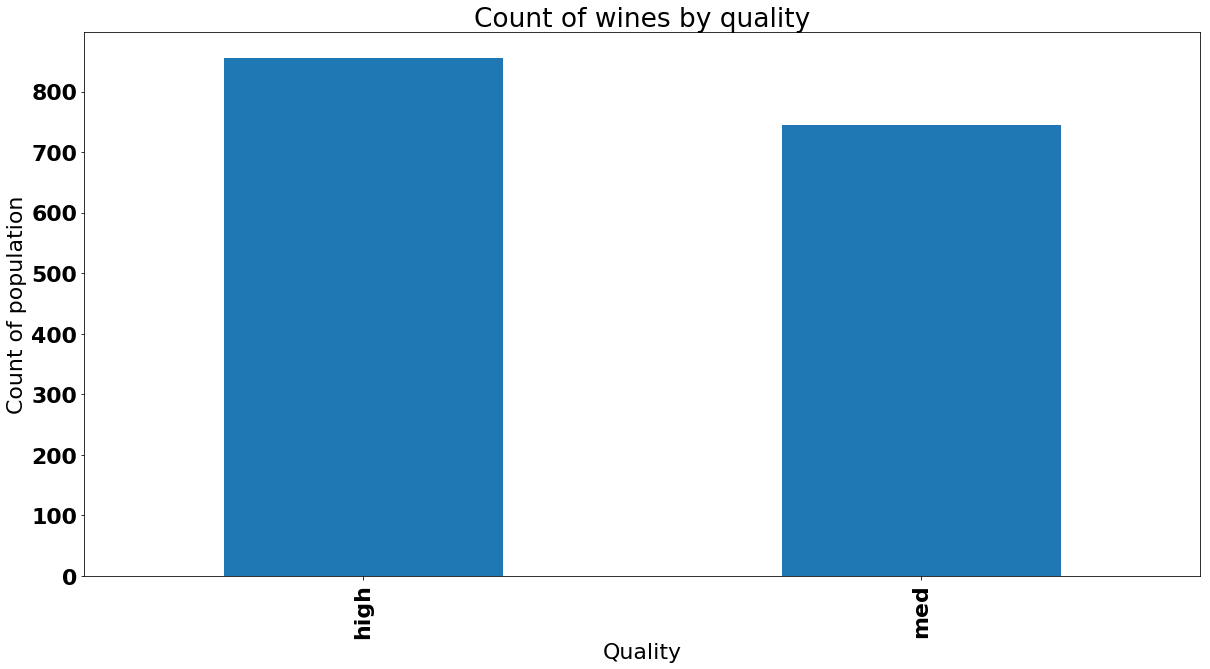

In [142]:
data['quality_score'].value_counts().plot(kind='bar', stacked=True, figsize=(20, 10))

plt.title('Count of wines by quality')
plt.xlabel('Quality')
plt.ylabel('Count of population')
font = {'family' : 'DejaVu Sans', 'weight' : 'bold', 'size' : '22'}
plt.rc('font', **font);
plt.show()

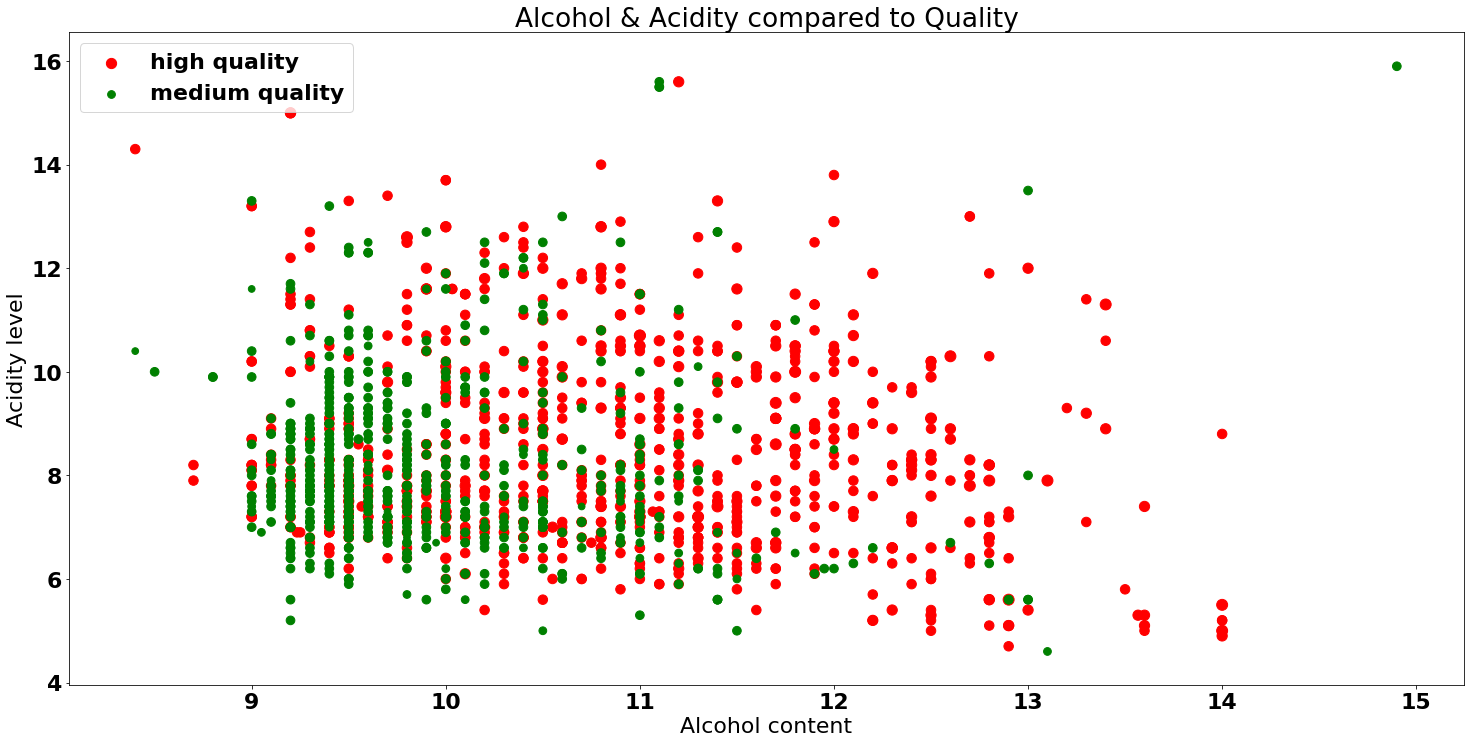

In [143]:
plt.figure(figsize=(25, 12))
ax = plt.subplot()

ax.scatter(data[data['quality_score'] == 'high']['alcohol'], data[data['quality_score'] == 'high']['fixed acidity'], c='red', s=data[data['quality_score'] == 'high']['quality']*15, label='high quality')
ax.scatter(data[data['quality_score'] == 'med']['alcohol'], data[data['quality_score'] == 'med']['fixed acidity'], c='green', s=data[data['quality_score'] == 'med']['quality']*15, label='medium quality')


ax.set_title('Alcohol & Acidity compared to Quality')
ax.set_xlabel('Alcohol content')
ax.set_ylabel('Acidity level')
font = {'family' : 'DejaVu Sans', 'weight' : 'bold', 'size' : '22'}
plt.rc('font', **font)

plt.legend();
plt.show()
# plt.savefig()

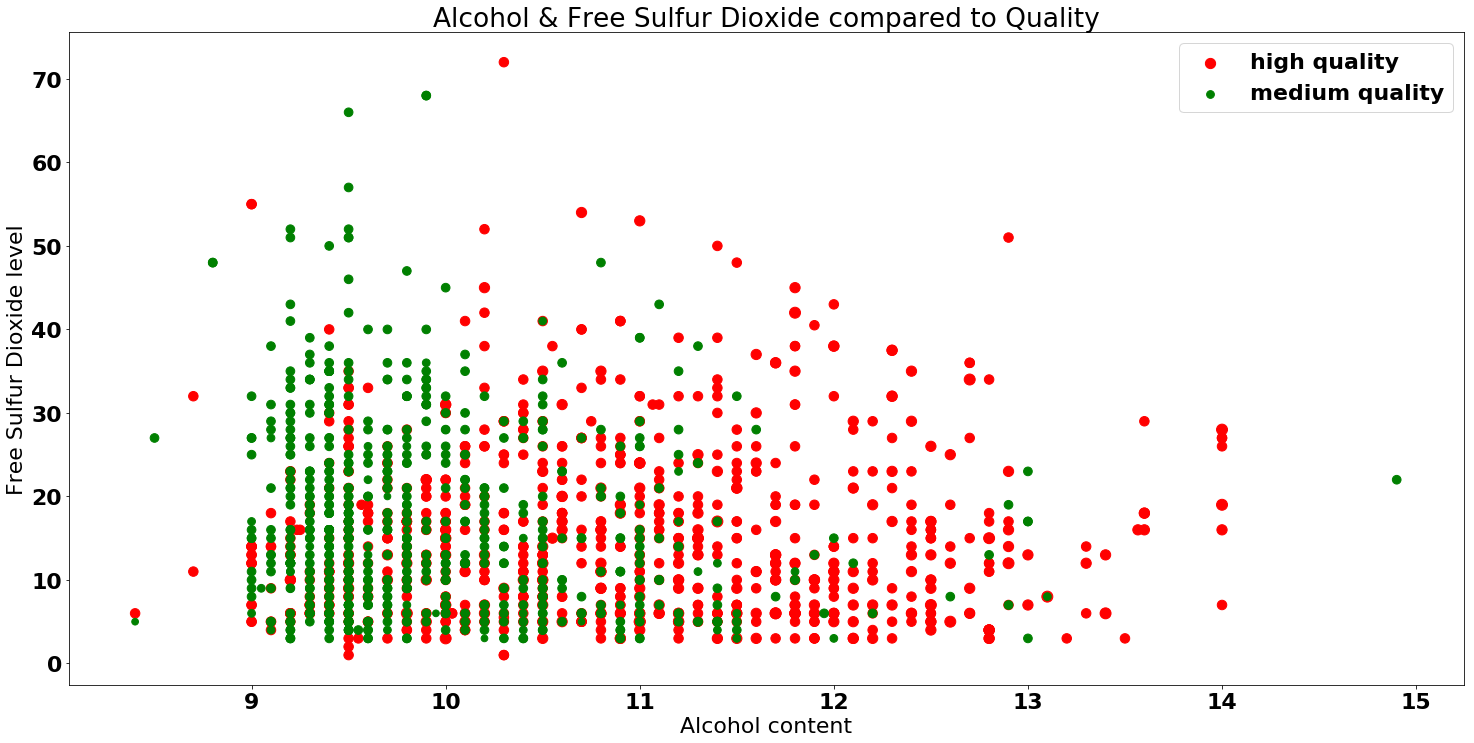

In [144]:
plt.figure(figsize=(25, 12))
ax = plt.subplot()

ax.scatter(data[data['quality_score'] == 'high']['alcohol'], data[data['quality_score'] == 'high']['free sulfur dioxide'], c='red', s=data[data['quality_score'] == 'high']['quality']*15, label='high quality')
ax.scatter(data[data['quality_score'] == 'med']['alcohol'], data[data['quality_score'] == 'med']['free sulfur dioxide'], c='green', s=data[data['quality_score'] == 'med']['quality']*15, label='medium quality')

ax.set_title('Alcohol & Free Sulfur Dioxide compared to Quality')
ax.set_xlabel('Alcohol content')
ax.set_ylabel('Free Sulfur Dioxide level')
font = {'family' : 'DejaVu Sans', 'weight' : 'bold', 'size' : '22'}
plt.rc('font', **font)

plt.legend();
plt.show()

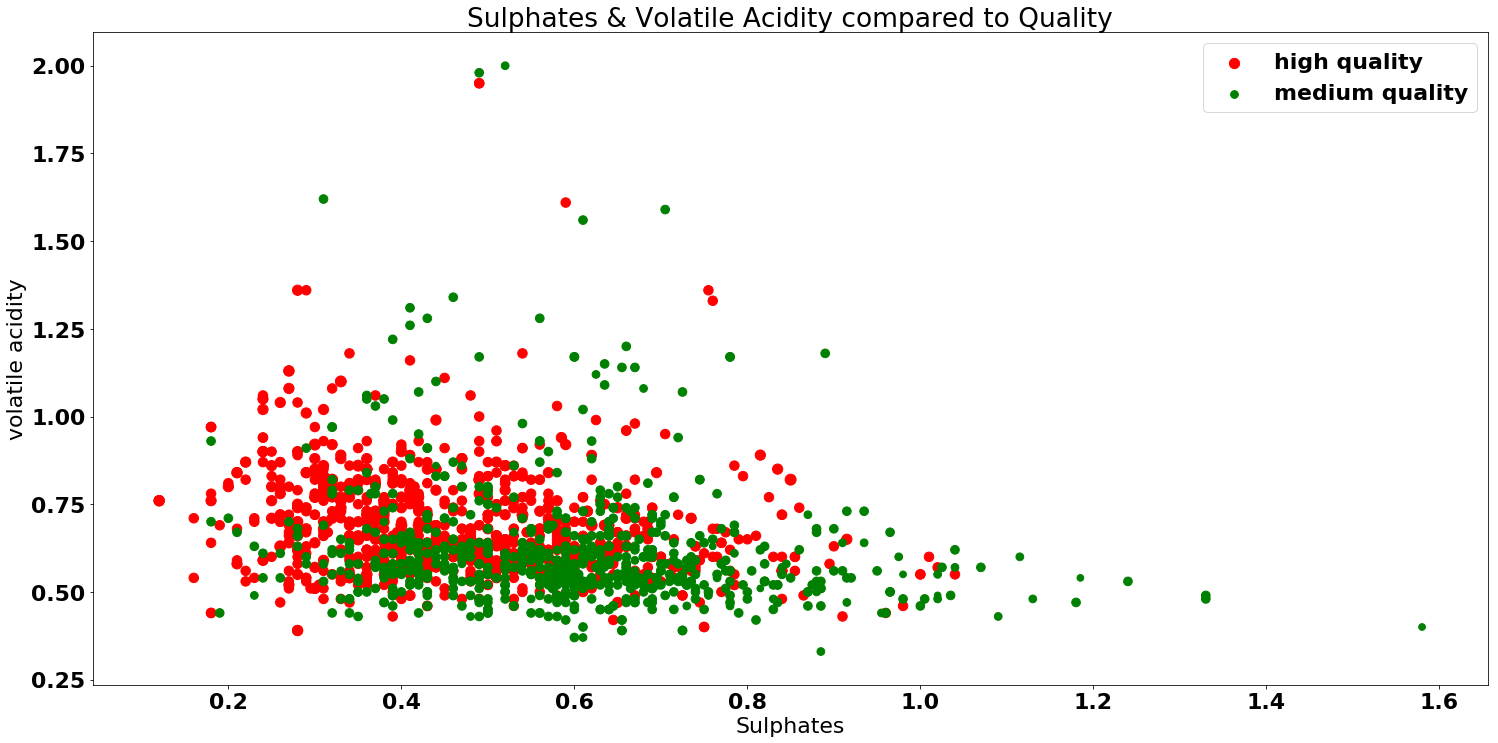

In [145]:
plt.figure(figsize=(25, 12))
ax = plt.subplot()

ax.scatter(data[data['quality_score'] == 'high']['volatile acidity'], data[data['quality_score'] == 'high']['sulphates'], c='red', s=data[data['quality_score'] == 'high']['quality']*15, label='high quality')
ax.scatter(data[data['quality_score'] == 'med']['volatile acidity'], data[data['quality_score'] == 'med']['sulphates'], c='green', s=data[data['quality_score'] == 'med']['quality']*15, label='medium quality')

ax.set_title('Sulphates & Volatile Acidity compared to Quality')
ax.set_xlabel('Sulphates')
ax.set_ylabel('volatile acidity')
font = {'family' : 'DejaVu Sans', 'weight' : 'bold', 'size' : '22'}
plt.rc('font', **font)

plt.legend();
plt.show()

In [146]:
# fig = plt.figure(figsize=(25, 20))
# sns.violinplot(x='alcohol', y='quality', hue='quality_score', data=data, split=True)
# plt.show()

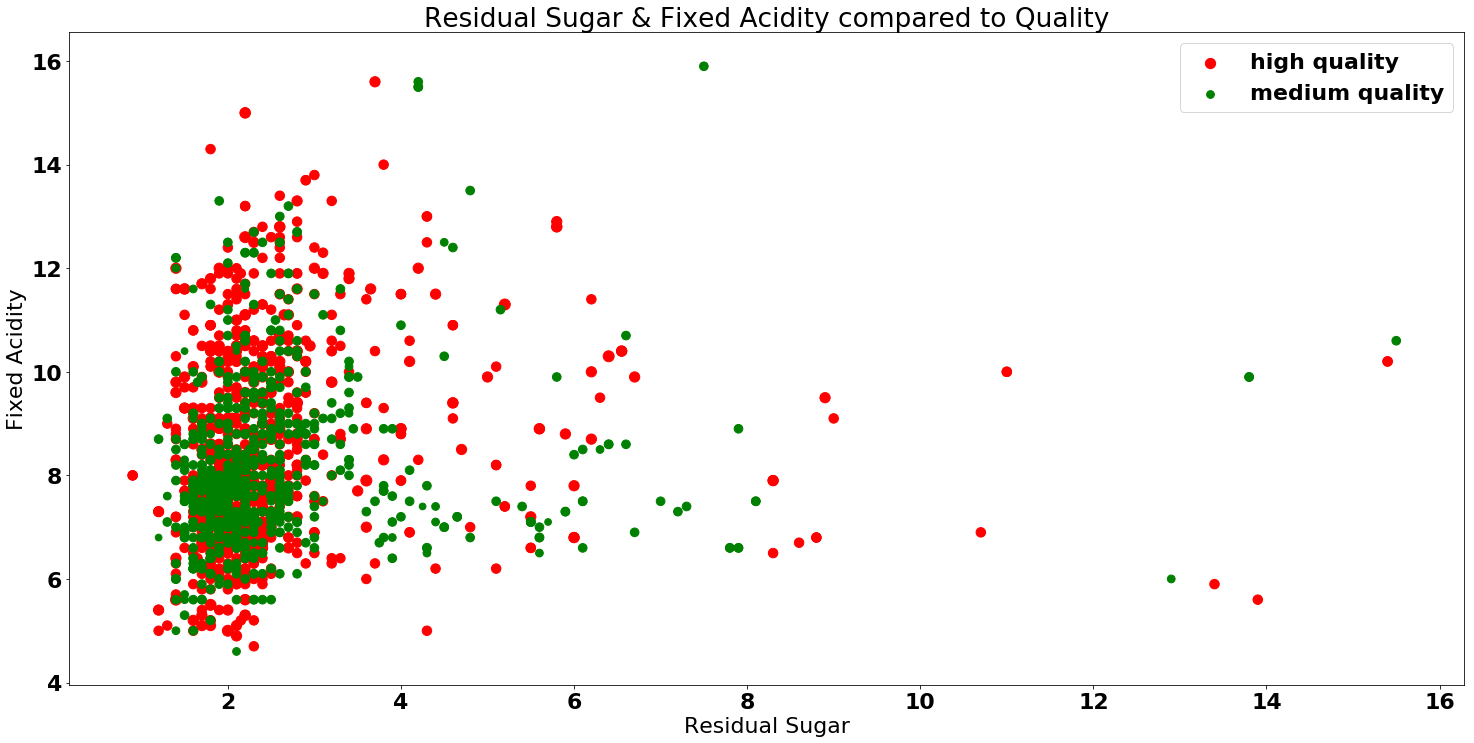

In [147]:
#START OF MY PLOTS
plt.figure(figsize=(25, 12))
ax = plt.subplot()

ax.scatter(data[data['quality_score'] == 'high']['residual sugar'], data[data['quality_score'] == 'high']['fixed acidity'], c='red', s=data[data['quality_score'] == 'high']['quality']*15, label='high quality')
ax.scatter(data[data['quality_score'] == 'med']['residual sugar'], data[data['quality_score'] == 'med']['fixed acidity'], c='green', s=data[data['quality_score'] == 'med']['quality']*15, label='medium quality')

ax.set_title('Residual Sugar & Fixed Acidity compared to Quality')
ax.set_xlabel('Residual Sugar')
ax.set_ylabel('Fixed Acidity')
font = {'family' : 'DejaVu Sans', 'weight' : 'bold', 'size' : '22'}
plt.rc('font', **font)

plt.legend();
plt.show()

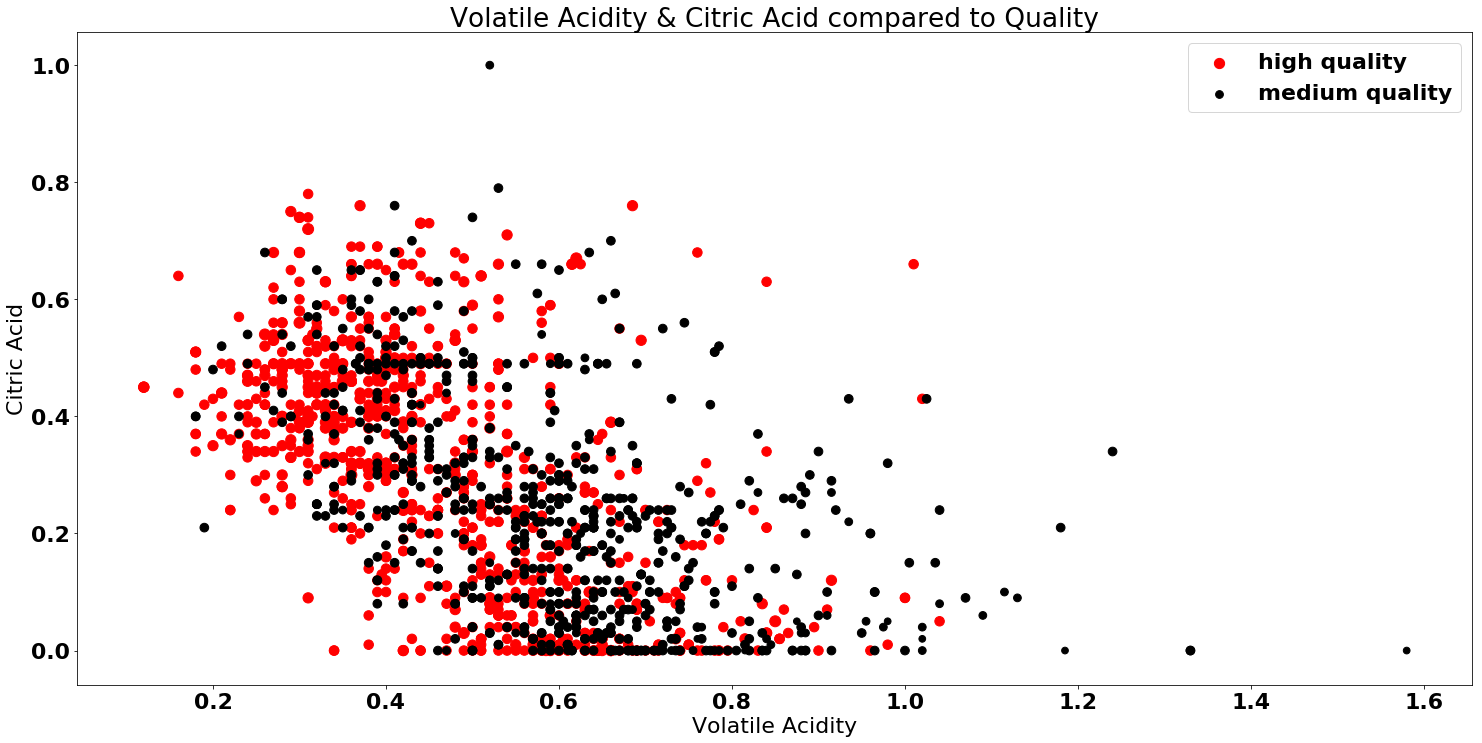

In [148]:
plt.figure(figsize=(25, 12))
ax = plt.subplot()

ax.scatter(data[data['quality_score'] == 'high']['volatile acidity'], data[data['quality_score'] == 'high']['citric acid'], c='red', s=data[data['quality_score'] == 'high']['quality']*15, label='high quality')
ax.scatter(data[data['quality_score'] == 'med']['volatile acidity'], data[data['quality_score'] == 'med']['citric acid'], c='black', s=data[data['quality_score'] == 'med']['quality']*15, label='medium quality')

ax.set_title('Volatile Acidity & Citric Acid compared to Quality')
ax.set_xlabel('Volatile Acidity')
ax.set_ylabel('Citric Acid')
font = {'family' : 'DejaVu Sans', 'weight' : 'bold', 'size' : '22'}
plt.rc('font', **font)

plt.legend();
plt.show()

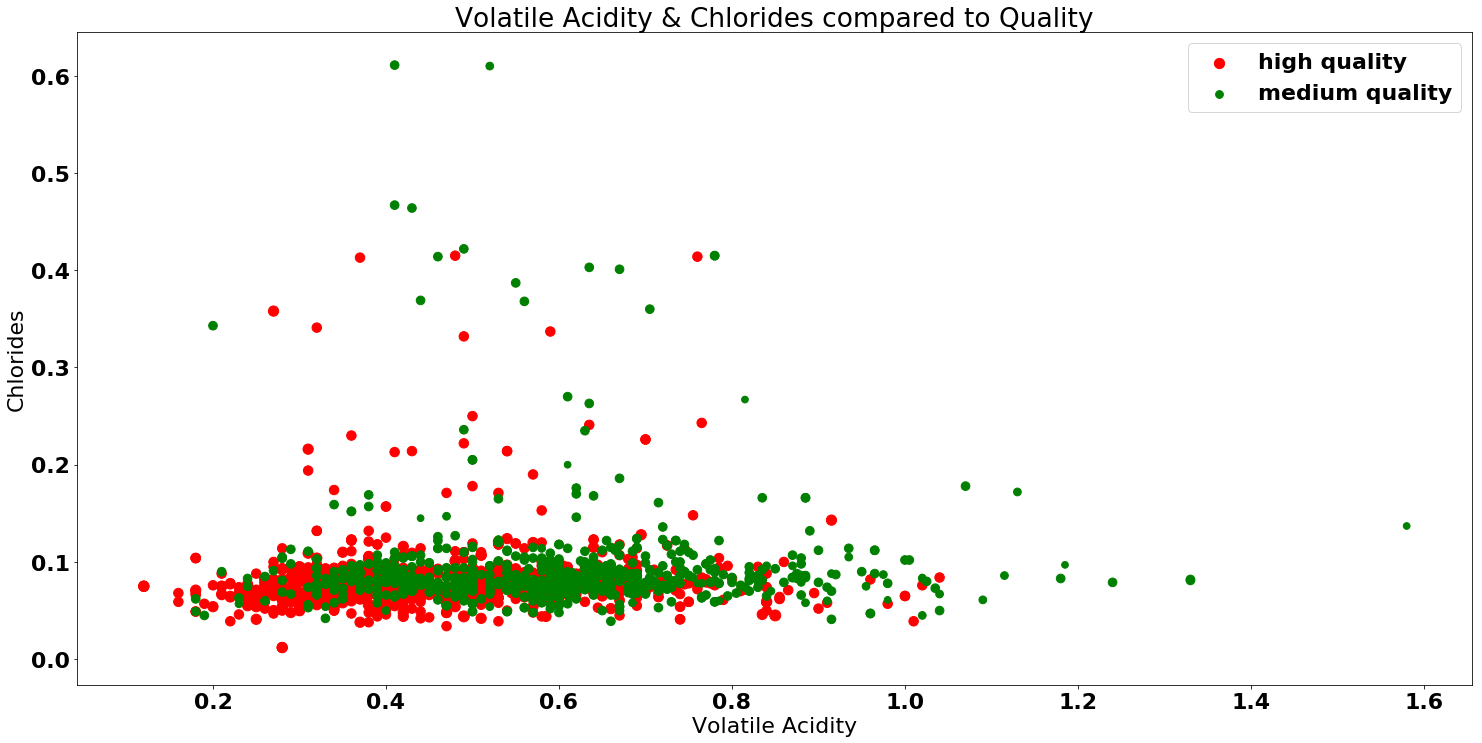

In [149]:
plt.figure(figsize=(25, 12))
ax = plt.subplot()

ax.scatter(data[data['quality_score'] == 'high']['volatile acidity'], data[data['quality_score'] == 'high']['chlorides'], c='red', s=data[data['quality_score'] == 'high']['quality']*15, label='high quality')
ax.scatter(data[data['quality_score'] == 'med']['volatile acidity'], data[data['quality_score'] == 'med']['chlorides'], c='green', s=data[data['quality_score'] == 'med']['quality']*15, label='medium quality')

ax.set_title('Volatile Acidity & Chlorides compared to Quality')
ax.set_xlabel('Volatile Acidity')
ax.set_ylabel('Chlorides')
font = {'family' : 'DejaVu Sans', 'weight' : 'bold', 'size' : '22'}
plt.rc('font', **font)

plt.legend();
plt.show()

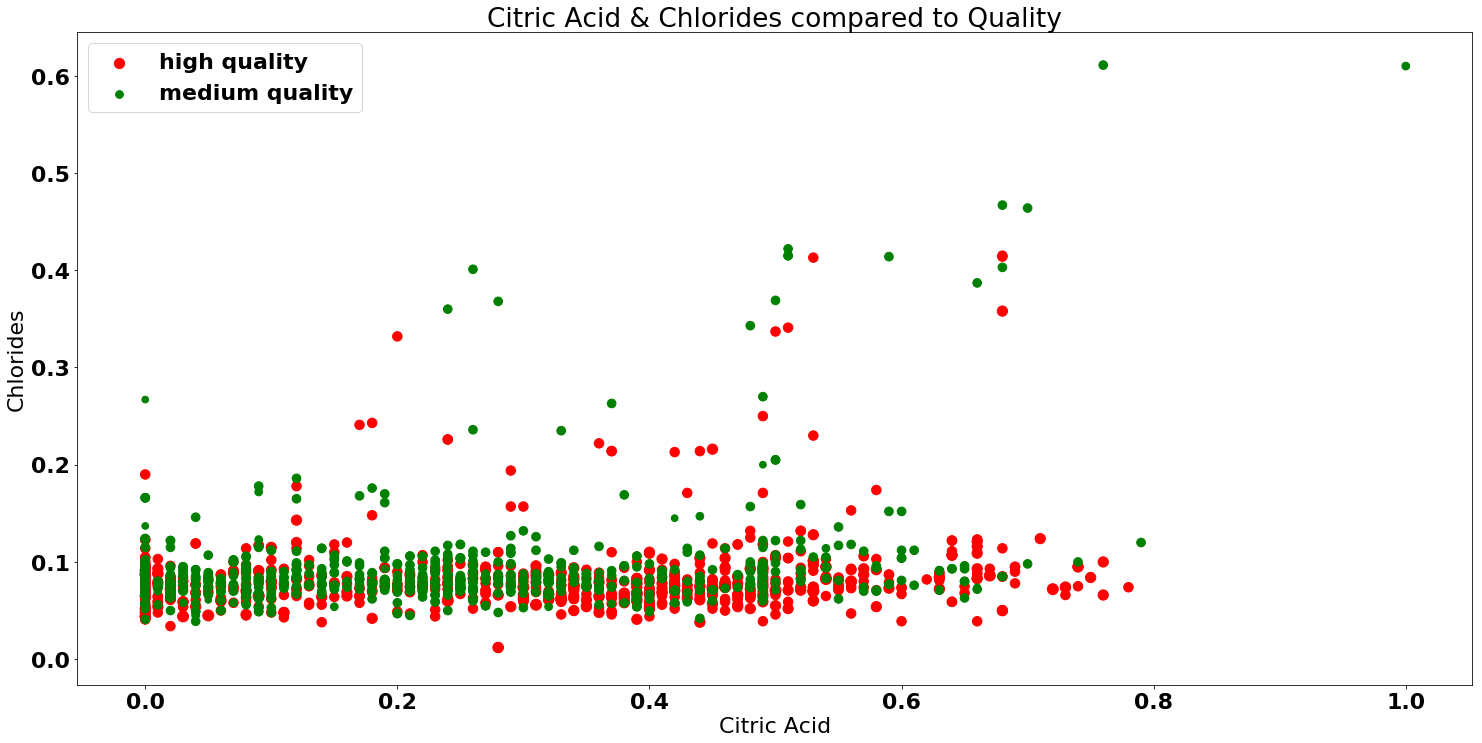

In [150]:
plt.figure(figsize=(25, 12))
ax = plt.subplot()

ax.scatter(data[data['quality_score'] == 'high']['citric acid'], data[data['quality_score'] == 'high']['chlorides'], c='red', s=data[data['quality_score'] == 'high']['quality']*15, label='high quality')
ax.scatter(data[data['quality_score'] == 'med']['citric acid'], data[data['quality_score'] == 'med']['chlorides'], c='green', s=data[data['quality_score'] == 'med']['quality']*15, label='medium quality')

ax.set_title('Citric Acid & Chlorides compared to Quality')
ax.set_xlabel('Citric Acid')
ax.set_ylabel('Chlorides')
font = {'family' : 'DejaVu Sans', 'weight' : 'bold', 'size' : '22'}
plt.rc('font', **font)

plt.legend();
plt.show()

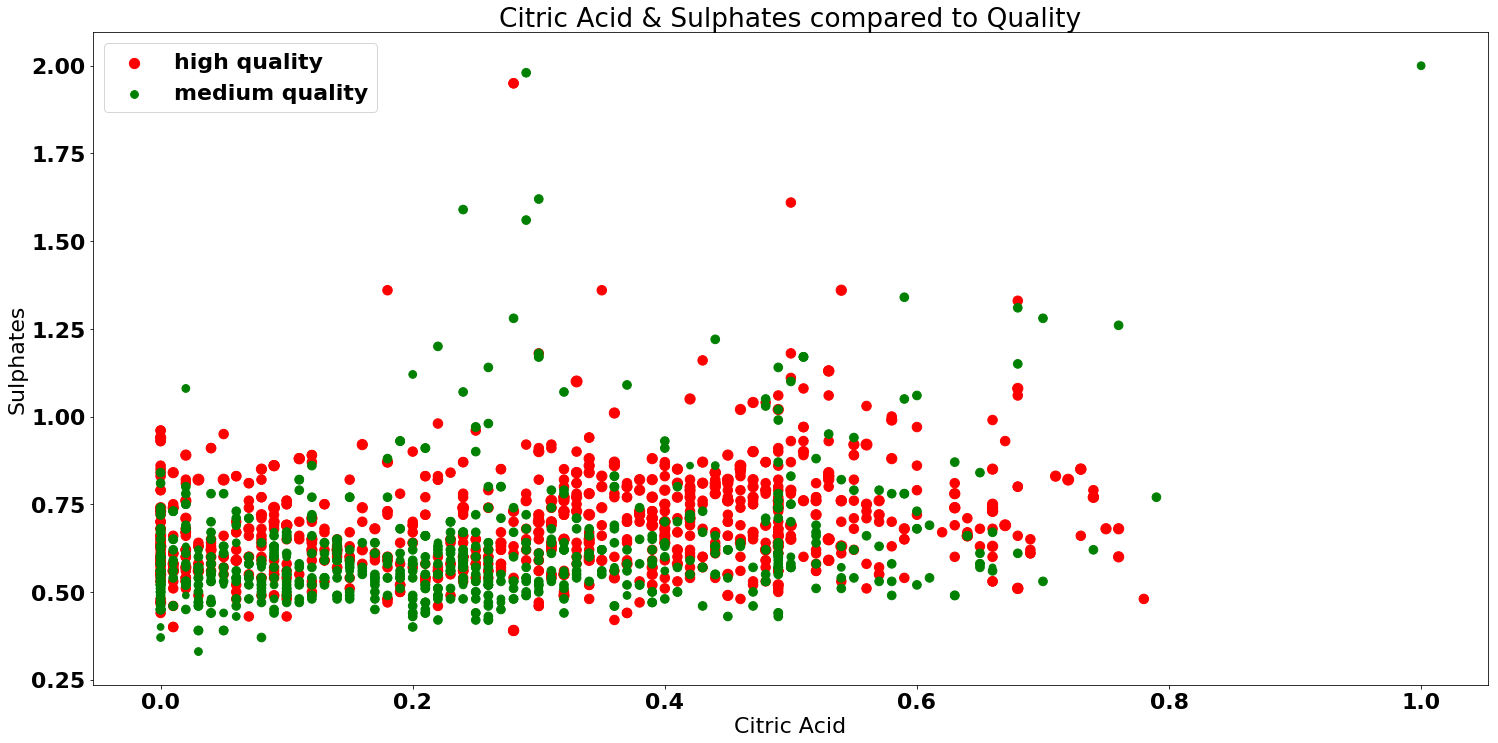

In [151]:
plt.figure(figsize=(25, 12))
ax = plt.subplot()

ax.scatter(data[data['quality_score'] == 'high']['citric acid'], data[data['quality_score'] == 'high']['sulphates'], c='red', s=data[data['quality_score'] == 'high']['quality']*15, label='high quality')
ax.scatter(data[data['quality_score'] == 'med']['citric acid'], data[data['quality_score'] == 'med']['sulphates'], c='green', s=data[data['quality_score'] == 'med']['quality']*15, label='medium quality')

ax.set_title('Citric Acid & Sulphates compared to Quality')
ax.set_xlabel('Citric Acid')
ax.set_ylabel('Sulphates')
font = {'family' : 'DejaVu Sans', 'weight' : 'bold', 'size' : '22'}
plt.rc('font', **font)

plt.legend();
plt.show()

In [152]:
X = (data[data['quality_score'] == 'high']['citric acid'])
Y = (data[data['quality_score'] == 'high']['sulphates'])
Z = (data['quality_score'])

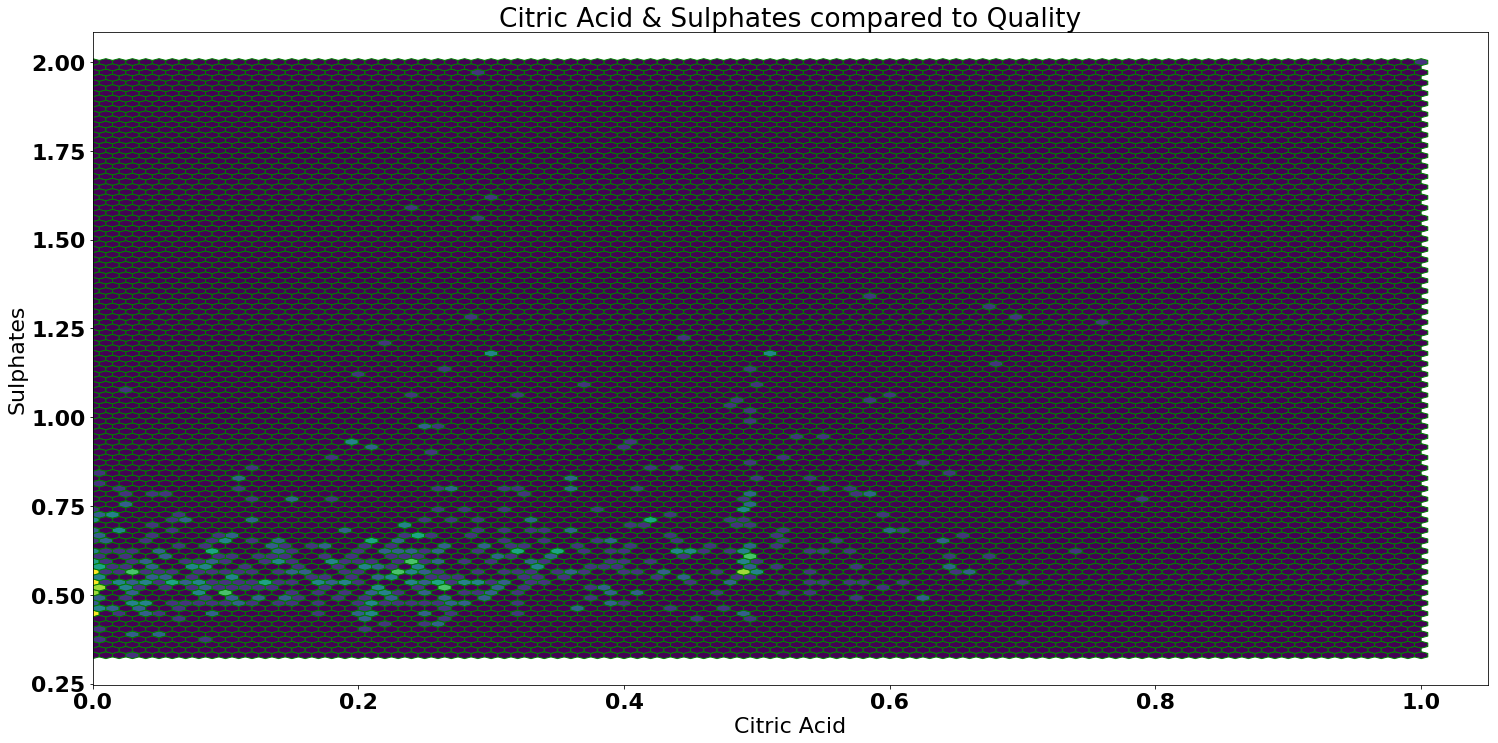

In [161]:
plt.figure(figsize=(25, 12))
ax = plt.subplot()

ax.hexbin(data[data['quality_score'] == 'high']['citric acid'], data[data['quality_score'] == 'high']['sulphates'], color='red')
ax.hexbin(data[data['quality_score'] == 'med']['citric acid'], data[data['quality_score'] == 'med']['sulphates'], color='green')

ax.set_title('Citric Acid & Sulphates compared to Quality')
ax.set_xlabel('Citric Acid')
ax.set_ylabel('Sulphates')
font = {'family' : 'DejaVu Sans', 'weight' : 'bold', 'size' : '22'}
plt.rc('font', **font)

#plt.legend();
plt.show()


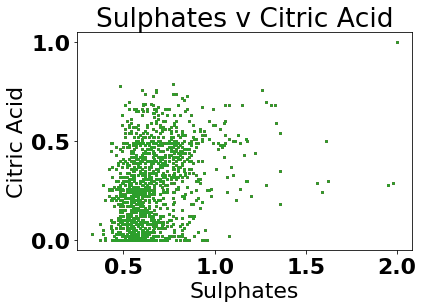

In [160]:
from cycler import cycler

fig, ax = plt.subplots()
ax.set_prop_cycle(cycler('color', ['tab:green','tab:blue','tab:red']))
for quality_score in data:
    ax.plot(data['sulphates'], data['citric acid'], alpha=1, linestyle='', 
            marker='o', ms=2, label=name)
#ax.legend()
ax.set_title('Sulphates v Citric Acid')
ax.set_xlabel('Sulphates')
ax.set_ylabel('Citric Acid')
plt.show()

In [ ]:
groups = merged_table[merged_table['quality_score']=="high"].groupby('quality')

fig, ax = plt.subplots()
ax.set_prop_cycle(cycler('color', ['tab:green','tab:orange','tab:red']))
for name, group in groups:
    ax.plot(group['sulphates'], group['citric acid'], alpha=0.6, linestyle='', 
            marker='o', ms=5, label=name)
ax.legend()
ax.set_title('damage_grade of bb5f foundation type')
ax.set_xlabel('area')
ax.set_ylabel('age')
plt.show()

In [73]:
data.head()

,fixed acidity,volatile acidity,citric acid,residual sugar,chlorides,free sulfur dioxide,total sulfur dioxide,density,pH,sulphates,alcohol,quality,quality_score
0,7.4,0.70,0.00,1.9,0.076,11.0,34.0,0.9978,3.51,0.56,9.4,5,med
1,7.8,0.88,0.00,2.6,0.098,25.0,67.0,0.9968,3.20,0.68,9.8,5,med
2,7.8,0.76,0.04,2.3,0.092,15.0,54.0,0.9970,3.26,0.65,9.8,5,med
3,11.2,0.28,0.56,1.9,0.075,17.0,60.0,0.9980,3.16,0.58,9.8,6,high
4,7.4,0.70,0.00,1.9,0.076,11.0,34.0,0.9978,3.51,0.56,9.4,5,med


In [74]:
data['Q'] = np.where(data['quality_score'] == 'low', 0,
                    np.where(data['quality_score'] == 'med', 1, np.where(data['quality_score'] == 'high', 3,4)))
data.head()

,fixed acidity,volatile acidity,citric acid,residual sugar,chlorides,free sulfur dioxide,total sulfur dioxide,density,pH,sulphates,alcohol,quality,quality_score,Q
0,7.4,0.70,0.00,1.9,0.076,11.0,34.0,0.9978,3.51,0.56,9.4,5,med,1
1,7.8,0.88,0.00,2.6,0.098,25.0,67.0,0.9968,3.20,0.68,9.8,5,med,1
2,7.8,0.76,0.04,2.3,0.092,15.0,54.0,0.9970,3.26,0.65,9.8,5,med,1
3,11.2,0.28,0.56,1.9,0.075,17.0,60.0,0.9980,3.16,0.58,9.8,6,high,3
4,7.4,0.70,0.00,1.9,0.076,11.0,34.0,0.9978,3.51,0.56,9.4,5,med,1


In [75]:
X = (data[data['quality_score'] == 'high']['citric acid'])
Y = (data[data['quality_score'] == 'high']['sulphates'])
Z = (data['Q'])

In [89]:
z = Z[1:].reshape(-1, 2)

C:\Anaconda\envs\PythonData\lib\site-packages\ipykernel_launcher.py:1: FutureWarning: reshape is deprecated and will raise in a subsequent release. Please use .values.reshape(...) instead
  """Entry point for launching an IPython kernel.


In [90]:
z.shape

(799, 2)

In [92]:
x = X[:799]
x.shape

(799,)

In [93]:
y = Y[:799]

In [94]:
ax.plot_wireframe(x, y, z, rstride=10, cstride=10)

plt.show()

ValueError: shape mismatch: objects cannot be broadcast to a single shape

In [96]:
X1,Y1 = np.meshgrid(x,y)

In [106]:
Z1, X2 = np.meshgrid(Z, X)

In [107]:
Z1.shape

(855, 1599)

In [108]:
fig = plt.figure()
ax = plt.axes(projection='3d')
ax.contour3D(X1,Y1,Z1, 50, cmap='binary')
plt.show()

TypeError: Shape of x does not match that of z: found (799, 799) instead of (855, 1599).

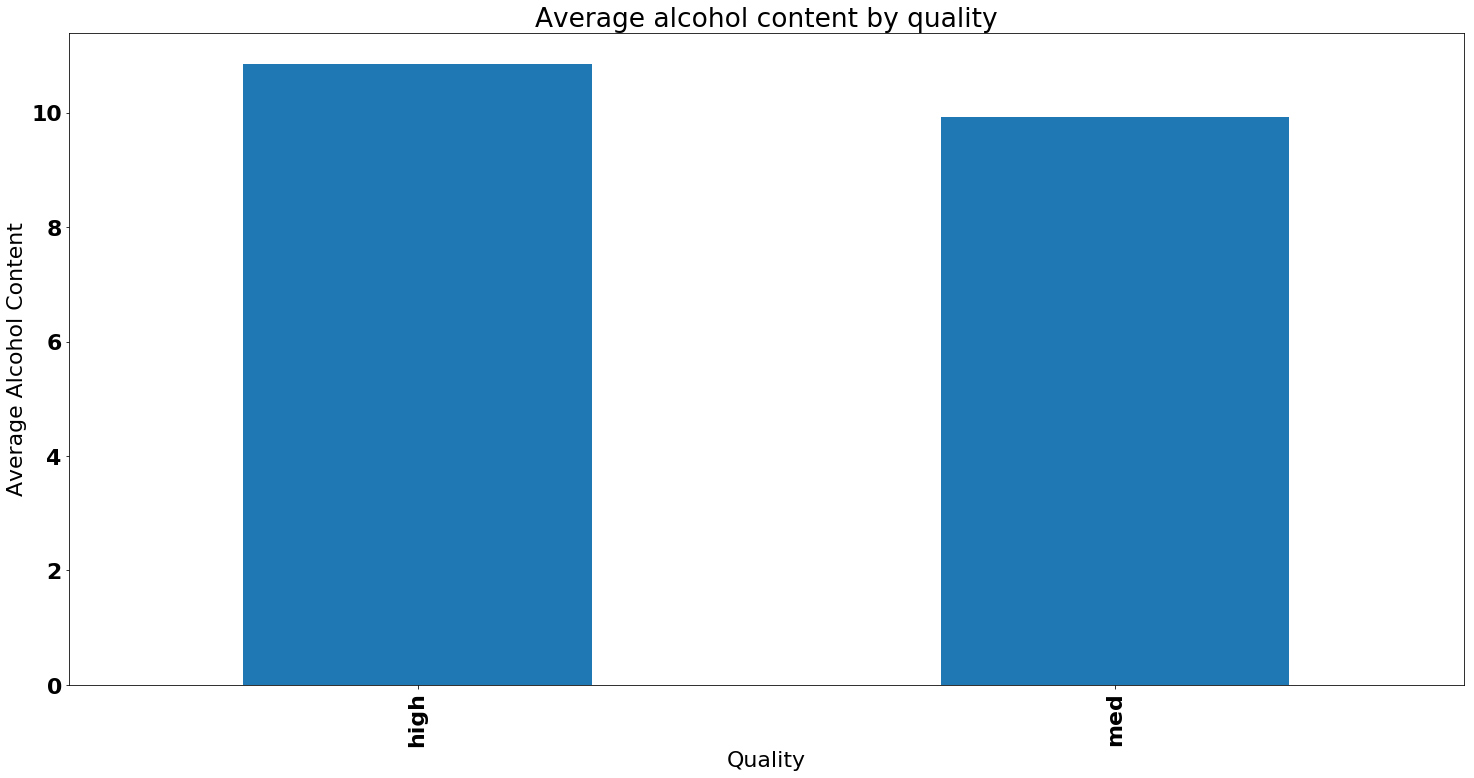

In [20]:
ax = plt.subplot()
data.groupby('quality_score').mean()['alcohol'].plot(kind='bar', figsize=(25, 12), ax=ax)

ax.set_title('Average alcohol content by quality')
ax.set_xlabel('Quality')
ax.set_ylabel('Average Alcohol Content')
font = {'family' : 'DejaVu Sans', 'weight' : 'bold', 'size' : '22'}
plt.rc('font', **font)

plt.show()

In [21]:
data.head()

,fixed acidity,volatile acidity,citric acid,residual sugar,chlorides,free sulfur dioxide,total sulfur dioxide,density,pH,sulphates,alcohol,quality,quality_score
0,7.4,0.70,0.00,1.9,0.076,11.0,34.0,0.9978,3.51,0.56,9.4,5,med
1,7.8,0.88,0.00,2.6,0.098,25.0,67.0,0.9968,3.20,0.68,9.8,5,med
2,7.8,0.76,0.04,2.3,0.092,15.0,54.0,0.9970,3.26,0.65,9.8,5,med
3,11.2,0.28,0.56,1.9,0.075,17.0,60.0,0.9980,3.16,0.58,9.8,6,high
4,7.4,0.70,0.00,1.9,0.076,11.0,34.0,0.9978,3.51,0.56,9.4,5,med


In [52]:
data['Q'] = np.where(data['quality_score'] == 'low', 0,
                    np.where(data['quality_score'] == 'med', 1, np.where(data['quality_score'] == 'high', 3,4)))
data.head()

KeyError: 'quality_score'

In [23]:
y = data['Q'].values

In [51]:
X = (data[data['quality_score'] == 'high']['citric acid'])
Y = (data[data['quality_score'] == 'high']['sulphates'])
Z = (data['quality_score'])

KeyError: 'quality_score'

In [24]:
from sklearn.pipeline import make_pipeline
from sklearn.ensemble import RandomForestClassifier
from sklearn.ensemble.gradient_boosting import GradientBoostingClassifier
from sklearn.feature_selection import SelectKBest
from sklearn.model_selection import StratifiedKFold
from sklearn.model_selection import train_test_split
from sklearn.model_selection import GridSearchCV
from sklearn.model_selection import cross_val_score
from sklearn.feature_selection import SelectFromModel
from sklearn.linear_model import LogisticRegression, LogisticRegressionCV
from sklearn.metrics import classification_report
from sklearn import preprocessing
from sklearn import metrics

In [25]:
data.head()

,fixed acidity,volatile acidity,citric acid,residual sugar,chlorides,free sulfur dioxide,total sulfur dioxide,density,pH,sulphates,alcohol,quality,quality_score,Q
0,7.4,0.70,0.00,1.9,0.076,11.0,34.0,0.9978,3.51,0.56,9.4,5,med,1
1,7.8,0.88,0.00,2.6,0.098,25.0,67.0,0.9968,3.20,0.68,9.8,5,med,1
2,7.8,0.76,0.04,2.3,0.092,15.0,54.0,0.9970,3.26,0.65,9.8,5,med,1
3,11.2,0.28,0.56,1.9,0.075,17.0,60.0,0.9980,3.16,0.58,9.8,6,high,3
4,7.4,0.70,0.00,1.9,0.076,11.0,34.0,0.9978,3.51,0.56,9.4,5,med,1


In [26]:
data.drop('quality_score', axis=1, inplace=True)
data.drop('Q', axis=1, inplace=True)
data.drop('quality', axis=1, inplace=True)

In [27]:
X_train, X_test, y_train, y_test = train_test_split(data, y, test_size=0.3, random_state=12, stratify = y)

grad_boost = GradientBoostingClassifier()
grad_boost.fit(X_train, y_train)

GradientBoostingClassifier(criterion='friedman_mse', init=None,
              learning_rate=0.1, loss='deviance', max_depth=3,
              max_features=None, max_leaf_nodes=None,
              min_impurity_decrease=0.0, min_impurity_split=None,
              min_samples_leaf=1, min_samples_split=2,
              min_weight_fraction_leaf=0.0, n_estimators=100,
              presort='auto', random_state=None, subsample=1.0, verbose=0,
              warm_start=False)

In [28]:
grad_boost.score(X_test,y_test)

0.77500000000000002

In [29]:
prec, recall, fscore, support = metrics.precision_recall_fscore_support(
    y_test, grad_boost.predict(X_test))
fscore

array([ 0.75342466,  0.79310345])

In [30]:
target_names = ['high quality', 'medium quality']
print(classification_report(y_test, grad_boost.predict(X_test), target_names=target_names))

                precision    recall  f1-score   support

  high quality       0.77      0.74      0.75       223
medium quality       0.78      0.81      0.79       257

   avg / total       0.77      0.78      0.77       480



In [31]:
def compute_score(clf, X, y, scoring='accuracy'):
    xval = cross_val_score(clf, X, y, cv = 5, scoring=scoring)
    return np.mean(xval)

In [32]:
clf = RandomForestClassifier(n_estimators=50, max_features='sqrt')
clf = clf.fit(X_train, y_train)

In [38]:
features = pd.DataFrame()
features['feature'] = data.columns     #Changed clf.columns to data.columns
features['importance'] = clf.feature_importances_
features.sort_values(by=['importance'], ascending=True, inplace=True)
features.set_index('feature', inplace=True)

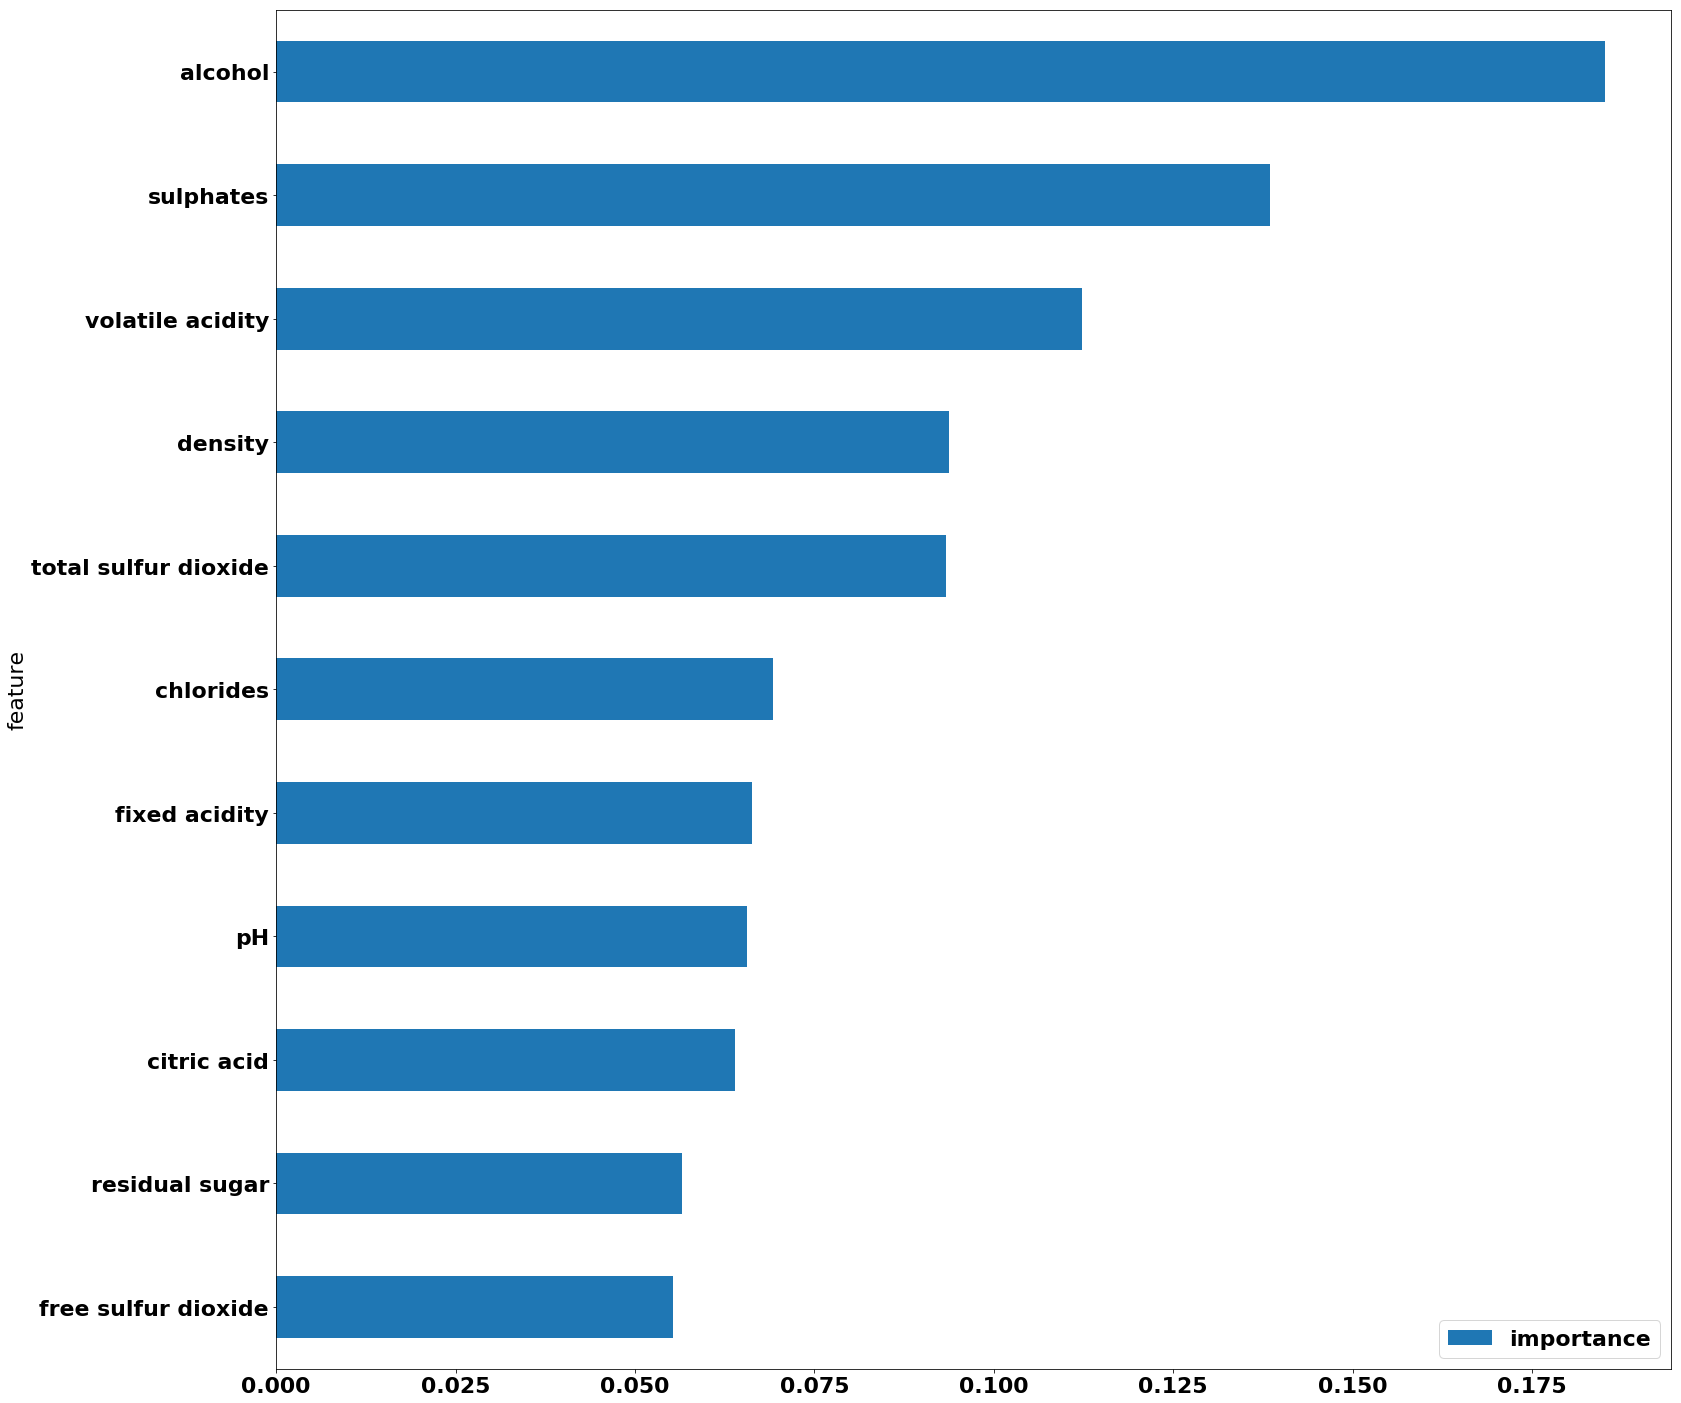

In [36]:
features.plot(kind='barh', figsize=(25, 25))
plt.show()

In [34]:
logreg = LogisticRegression()
logreg_cv = LogisticRegressionCV()
rf = RandomForestClassifier(random_state=42)
gboost = GradientBoostingClassifier(random_state=20)

models = [logreg, logreg_cv, rf, gboost]

In [35]:
for model in models:
    print('Cross-validation of : {0}'.format(model.__class__))
    score = compute_score(clf=model, X=X_train, y=y_train, scoring='accuracy')
    print('CV score = {0}'.format(score))
    print('****')

Cross-validation of : <class 'sklearn.linear_model.logistic.LogisticRegression'>
CV score = 0.7337221688376397
****
Cross-validation of : <class 'sklearn.linear_model.logistic.LogisticRegressionCV'>
CV score = 0.7390833155384726
****
Cross-validation of : <class 'sklearn.ensemble.forest.RandomForestClassifier'>
CV score = 0.7658891558118015
****
Cross-validation of : <class 'sklearn.ensemble.gradient_boosting.GradientBoostingClassifier'>
CV score = 0.7819768132963201
****


In [36]:
model = GradientBoostingClassifier(verbose=1, random_state=20)
model.fit(X_train, y_train)

      Iter       Train Loss   Remaining Time 
         1           1.3247            0.30s
         2           1.2765            0.24s
         3           1.2345            0.23s
         4           1.1966            0.24s
         5           1.1634            0.23s
         6           1.1337            0.23s
         7           1.1073            0.23s
         8           1.0843            0.23s
         9           1.0627            0.23s
        10           1.0443            0.22s
        20           0.9152            0.16s
        30           0.8432            0.10s
        40           0.7922            0.11s
        50           0.7578            0.07s
        60           0.7307            0.06s
        70           0.7030            0.04s
        80           0.6753            0.03s
        90           0.6500            0.02s
       100           0.6266            0.00s


GradientBoostingClassifier(criterion='friedman_mse', init=None,
              learning_rate=0.1, loss='deviance', max_depth=3,
              max_features=None, max_leaf_nodes=None,
              min_impurity_decrease=0.0, min_impurity_split=None,
              min_samples_leaf=1, min_samples_split=2,
              min_weight_fraction_leaf=0.0, n_estimators=100,
              presort='auto', random_state=20, subsample=1.0, verbose=1,
              warm_start=False)

In [37]:
run_gs = False

if run_gs:
    parameter_grid = {
                 'max_depth' : [4, 6, 8, 10, 20, 25],
                 'n_estimators': [50, 10, 20, 100, 200, 1000],
                 'max_features': ['sqrt', 'auto', 'log2'],
                 'min_samples_split': [2, 3,4,5,6,7,8,9, 10],
                 'min_samples_leaf': [2,3,4,5,6,7,8],
                 }
    boost = GradientBoostingClassifier()
    cross_validation = StratifiedKFold(n_splits=5)

    grid_search = GridSearchCV(boost,
                               scoring='accuracy',
                               param_grid=parameter_grid,
                               cv=cross_validation,
                               verbose=1,
                               n_jobs=-1
                              )

    grid_search.fit(X_train, y_train)
    model = grid_search
    parameters = grid_search.best_params_

    print('Best score: {}'.format(grid_search.best_score_))
    print('Best parameters: {}'.format(grid_search.best_params_))
    
else: 
    parameters = {'min_samples_leaf': 7, 
                  'n_estimators': 200, 'min_samples_split': 6, 
                  'max_features': 'log2', 'max_depth': 4}
    
    model = GradientBoostingClassifier(**parameters)
    model.fit(X_train, y_train)

In [38]:
scores = cross_val_score(model, X_train, y_train, cv = 5, scoring='accuracy')
scores.mean()

0.79267522599473272

In [320]:
# output = model.predict(test).astype(int)
# df_output = data
# file = os.path.join('winequality-red.csv')
# aux = pd.read_csv(file)
# df_output[data.index] = aux.index
# df_output['quality_score'] = output
# df_output[[data.index],'quality_score'].to_csv('red_wine_model.csv', index=False)